# Project: Investigate a Dataset
## Using Gapminder.org datasets to explore relationships between economic and health factors around the world

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

__[**Gapminder.org**](http://gapminder.org)__ is an independent apolitical non-partisan Swedish organization whose stated goal is to promote a better understanding of the world through dissemination of data and data visualization tools. They have a fairly large repository of data from a variety of sources, including the United Nations and World Bank, and these datasets document a number of social, economic and health variables ranging from GDP to rates of tuberculosis infection. My goal for this project is to incorporate as many datasets as my aging laptop can handle, and then do a multivariate analysis to ask questions such as: 
<br>
>_How is GDP per capita related to child mortality?_ <br>
>_Are HIV mortality rates in children related to maternal mortality?_<br>
>_Do more agrarian economies have lower GDP per capita?_<br>

After browsing through over 500 different datasets, 18 were chosen representing a broad range of factors. As an aid to understanding and interpreting the results, the dataset descriptions and associated dataframe names are listed as follows:<br>
>health_exp - annual health expeditures as a percent of GDP<br>
fertility - fertility rate as number of children per woman<br>
mort5 - under age 5 mortality by all causes per 1000 live births<br>
dead_moms - lifetime risk during pregnancy or within 42 days post-partum per 1000<br>
internet - internet users per 100 people<br>
industry - industry as percent of GDP<br>
agriculture - agriculture as percent of GDP<br>
HIV_dead - HIV deaths under age 5 per 1000<br>
girls2boys - the ratio of girls to boys in primary and secondary school<br>
gdp_pc - GDP per capita<br>
diarrhea - deaths due to diarrheal disease under age 5 per 1000<br>
pneumonia - deaths due to pneumonia under age 5 per 1000<br>
cell_phone - cell phones per 100 people<br>
democracy - index of democracy in a country<br>
corruption - corruption index<br>
gini - GINI index of income inequality<br>
high_tech - percent of manufactured exports that are considered high tech<br>
military - military expenditures as percent of GDP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.7.0


In [3]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

<a id='wrangling'></a>
## Data Wrangling

> While browsing the Gapminder datasets online, it quickly became apparent that the size and quality of datasets varies quite dramatically, with some datasets only reporting a single year of data, and others going back to 1800, and with many missing values across countries and years. Let's begin by examining one dataset, the maternal deaths per 1000 live births. 

### General Properties

In [4]:
df_dead_moms = pd.read_csv('dead_moms.csv')
df_dead_moms.head(10)

country        2005       2008  dead_moms
0               Abkhazia         NaN        NaN        NaN
1            Afghanistan  125.000000  90.909091  31.250000
2  Akrotiri and Dhekelia         NaN        NaN        NaN
3                Albania    2.040816   0.588235   0.454545
4                Algeria    4.545455   2.941176   2.325581
5         American Samoa         NaN        NaN        NaN
6                Andorra         NaN        NaN        NaN
7                 Angola   83.333333  34.482759  25.641026
8               Anguilla         NaN        NaN        NaN
9    Antigua and Barbuda         NaN        NaN        NaN

This is a rather sparse dataset with lots of missing values. Since we're not going to be doing a temporal analysis, we really only need two columns: the country column and the year (2010 for this and most other datasets, 2005 if that's the only available year). I've renamed the country column 'country', and instead of 2010, put the column header as a descriptor of the data contained within, in this case 'dead_moms', then saved a new version of the file as a csv. We'll do this for all of the datasets.

Since we only want two columns, we'll use the _index col_ to specify _country_ as the index, and the _usecols =_ to grab the country and data columns. This seems more economical than importing the entire file when we know in advance that we're not interested in most of it. 

In [5]:
df_dead_moms = pd.read_csv('dead_moms.csv',
                            index_col = 'country', usecols=['country', 'dead_moms'])
df_dead_moms.head(10)

dead_moms
country                         
Abkhazia                     NaN
Afghanistan            31.250000
Akrotiri and Dhekelia        NaN
Albania                 0.454545
Algeria                 2.325581
American Samoa               NaN
Andorra                      NaN
Angola                 25.641026
Anguilla                     NaN
Antigua and Barbuda          NaN

This is much easier to deal with. There are still a lot of missing data points, but since we're looking at a global portrait, nobody's going to miss Abhkazia or Anguilla in the final analysis. 

Using the above approach import the remaining dataframes:

In [6]:
df_health_exp = pd.read_csv('total_health_expend_pcGDP.csv', 
                            index_col = 'country', usecols=['country','health_expend'])
df_fertility = pd.read_csv('un_data_total_fertility.csv', 
                            index_col = 'country', usecols=['country','fertility'])
df_mort5 = pd.read_csv('under_5_mortality.csv', 
                            index_col = 'country', usecols=['country','mort5'])
df_internet = pd.read_csv('internet_per100.csv',
                            index_col = 'country', usecols=['country', 'internet'])
df_industry = pd.read_csv('industry_pc_ of_GDP.csv',
                            index_col = 'country', usecols=['country', 'industry'])
df_HIV_dead = pd.read_csv('HIV_under5_death_per1000.csv',
                            index_col = 'country', usecols=['country', 'HIV_dead'])
df_girls2boys = pd.read_csv('girls_to_boys_in_school.csv',
                            index_col = 'country', usecols=['country', 'girls2boys'])
df_gdp_pc = pd.read_csv('gdp_per_capita.csv',
                            index_col = 'country', usecols=['country', 'gdp_pc'])
df_diarrhea = pd.read_csv('diarrhea_under_5.csv',
                            index_col = 'country', usecols=['country', 'diarrhea'])
df_cell_phone = pd.read_csv('cell_phone_per100.csv',
                            index_col = 'country', usecols=['country', 'cell_phone'])
df_agriculture = pd.read_csv('agriculture_pc_of_GDP.csv',
                            index_col = 'country', usecols=['country', 'agriculture'])
df_democracy = pd.read_csv('democracy.csv',
                            index_col = 'country', usecols=['country', 'democracy'])
df_corruption = pd.read_csv('corruption.csv',
                            index_col = 'country', usecols=['country', 'corruption'])
df_gini = pd.read_csv('gini.csv',
                            index_col = 'country', usecols=['country', 'gini'])
df_high_tech = pd.read_csv('high_tech.csv',
                            index_col = 'country', usecols=['country', 'high_tech'])
df_military = pd.read_csv('military.csv',
                            index_col = 'country', usecols=['country', 'military'])
df_pneumonia = pd.read_csv('pneumonia.csv',
                            index_col = 'country', usecols=['country', 'pneumonia'])

Let's take a look at the diarrhea data in df_diarrhea:

In [8]:
df_diarrhea.head(10)

diarrhea
country               
Afghanistan  69.550850
Albania       0.260445
Algeria       5.161940
Angola       52.401916
Argentina     0.120420
Armenia       0.382117
Australia     0.018707
Austria       0.013182
Azerbaijan    4.169935
Bahamas       0.177117

Looking good. And what's tragically apparent even before we get started is that just in the header we can see that Afghanistan has a rate of death over 5000 times that of Austria. Now we have to merge all these together into one dataframe. 


#### When merging, 'inner' gives the intersection on index, 'outer' gives the union<br>
I chose the _inner_ method because I only want those countries that have all or most of the data that I'm looking for. Choosing _outer_ would just require more cleanup of those pesky NaN values after merging. 
>_Note to reviewers: I realize there are probably multiple ways to accomplish this, but this was the best I could come up with. I just couldn't find a method that would join them all at once. But if there are suggestions to improve upon this I would be happy to incorporate them into future versions or revision._

In [9]:
df_combo00 = pd.merge(df_agriculture, df_gini, on='country', how='inner')
df_combo01 = pd.merge(df_combo00, df_cell_phone, on='country', how='inner')
df_combo02 = pd.merge(df_combo01, df_diarrhea, on='country', how='inner')
df_combo03 = pd.merge(df_combo02, df_gdp_pc, on='country', how='inner')
df_combo04 = pd.merge(df_combo03, df_democracy, on='country', how='inner')
df_combo05 = pd.merge(df_combo04, df_girls2boys, on='country', how='inner')
df_combo06 = pd.merge(df_combo05, df_HIV_dead, on='country', how='inner')
df_combo07 = pd.merge(df_combo06, df_industry, on='country', how='inner')
df_combo08 = pd.merge(df_combo07, df_internet, on='country', how='inner')
df_combo09 = pd.merge(df_combo08, df_dead_moms, on='country', how='inner')
df_combo10 = pd.merge(df_combo09, df_corruption, on='country', how='inner')
df_combo12 = pd.merge(df_combo10, df_health_exp, on='country', how='inner')
df_combo13 = pd.merge(df_combo12, df_fertility, on='country', how='inner')
df_combo14 = pd.merge(df_combo13, df_high_tech, on='country', how='inner')
df_combo15 = pd.merge(df_combo14, df_military, on='country', how='inner')
df_combo16 = pd.merge(df_combo15, df_pneumonia, on='country', how='inner')
df_all = pd.merge(df_combo16, df_mort5, on='country', how='inner')
df_all.head(10)

agriculture   gini  cell_phone   diarrhea   gdp_pc  democracy  \
country                                                                      
Afghanistan    39.480416  27.82   41.385796  69.550850   1637.0        NaN   
Albania        22.800000  34.51   84.024138   0.260445   9374.0        9.0   
Algeria         8.221657    NaN   92.421261   5.161940  12494.0        2.0   
Angola          8.489994    NaN   46.689242  52.401916   7047.0       -2.0   
Argentina       9.401029  46.26  132.880086   0.120420  15765.0        8.0   
Armenia        20.892517  30.86  125.008538   0.382117   6508.0        5.0   
Australia       3.265037    NaN  101.040111   0.018707  41330.0       10.0   
Austria         1.605755    NaN  145.836540   0.013182  42861.0       10.0   
Azerbaijan      9.895473  33.71   99.045798   4.169935  15950.0       -7.0   
Bahrain              NaN    NaN  124.184224   0.071551  40553.0       -5.0   

             girls2boys  HIV_dead   industry   internet  dead_moms  \
country                                                              
Afghanistan      55.451  0.013401  25.275687   3.654114  31.250000   
Albania             NaN  0.000000  21.500000  45.000000   0.454545   
Algeria          99.339  0.054587  61.310433  12.500000   2.325581   
Angola              NaN  3.814268  72.596351  10.000000  25.641026   
Argentina       103.818  0.021763  35.609094  40.000000   1.785714   
Armenia         102.289  0.084915  45.298178        NaN   0.588235   
Australia        99.172  0.000000  26.772962  75.892931   0.123457   
Austria          96.500  0.000000  29.260587  75.204701   0.054945   
Azerbaijan       95.151  0.060346  63.595370  46.677990   1.000000   
Bahrain          98.435  0.000000        NaN  55.000000   0.555556   

             corruption  health_expend  fertility  high_tech  military  \
country                                                                  
Afghanistan         1.4            7.6       5.66        NaN  3.342447   
Albania             3.3            6.5       1.74   4.222700  1.602359   
Algeria             2.9            4.2       2.82   1.484616  3.502365   
Angola              1.9            2.9       6.22        NaN  4.248275   
Argentina           2.9            8.1       2.22   6.826630  0.938616   
Armenia             2.6            4.4       1.55   0.619179  4.226594   
Australia           8.7            8.7       1.89  12.791912  1.970070   
Austria             7.9           11.0       1.44  13.742933  0.926634   
Azerbaijan          2.4            5.9       1.97   1.056413  2.790533   
Bahrain             4.9            5.0       2.14   0.066560  3.384565   

             pneumonia  mort5  
country                        
Afghanistan  57.320016  105.0  
Albania       2.300597   16.6  
Algeria       5.184335   27.4  
Angola       38.659694  182.5  
Argentina     0.922739   14.6  
Armenia       2.589904   18.0  
Australia     0.112243    4.8  
Austria       0.039547    4.4  
Azerbaijan    6.475167   39.0  
Bahrain       0.143102    8.3

In [10]:
#save dataframe to new .csv file
df_all.to_csv('Gapminder_all_data.csv')

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
agriculture      148 non-null float64
gini             42 non-null float64
cell_phone       161 non-null float64
diarrhea         162 non-null float64
gdp_pc           162 non-null float64
democracy        150 non-null float64
girls2boys       126 non-null float64
HIV_dead         162 non-null float64
industry         152 non-null float64
internet         158 non-null float64
dead_moms        162 non-null float64
corruption       161 non-null float64
health_expend    157 non-null float64
fertility        162 non-null float64
high_tech        131 non-null float64
military         125 non-null float64
pneumonia        162 non-null float64
mort5            162 non-null float64
dtypes: float64(18)
memory usage: 24.0+ KB


### Data cleanup explained
Because of the nature of these datasets, and their variable quality/completeness, the usual means of dealing with missing data or NaN values, may not apply here. I really want to include the GINI index in my analyses, but it only has 42 values. If I eliminate rows that have missing values, I would lose much of the other datasets. And because each row represents a single country, there is no way to take the means to fill in the values since on any given metric countries can differ by many thousands-fold. So I will do some preliminary data exploration first before I hone in on a subset where I'll clean up the NaNs. 

#### Q: How to deal with NaN (missing) values?  A: Ignore them (for now)
As the following demo shows, Python and matplotlib have no problems with simply ignoring missing data points when doing regression analysis and scatterplots

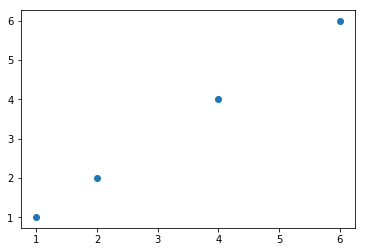

In [12]:
plt.scatter([1, 2, 3, 4, 5, 6], [1, 2, np.nan, 4, np.nan, 6])
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

I'm interested in how different social, economic and health indicators might be related. It's a fair bet that poorer countries, i.e., low GDP per capita, will do more poorly on measures of child mortality: children in developed countries rarely die of diarrhea or pneumonia, but these are the two greatest causes of under-5 child mortality globally. But what about other factors? Is it possible that the level of democracy or corruption might correlate with infant mortality or GDP? So many questions, especially with 17 different datasets. So the logical and easiest first step is just to plot a scatter matrix of all the relationships and see what we get.

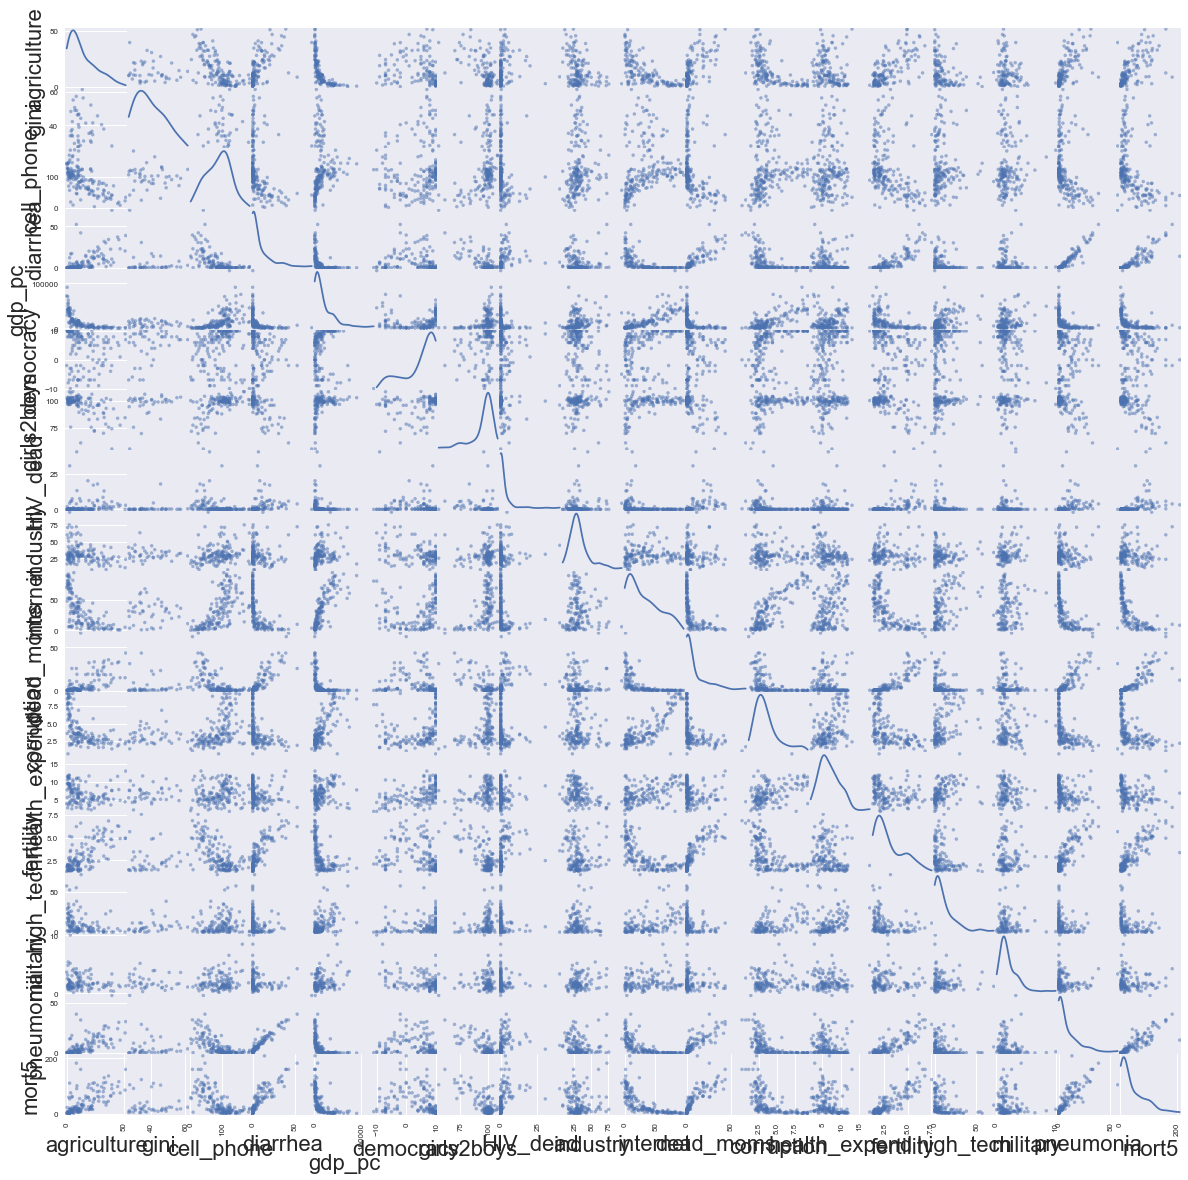

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_all, alpha=0.5, figsize=(20,20), diagonal = 'kde');

### Let's try seaborn for comparison...

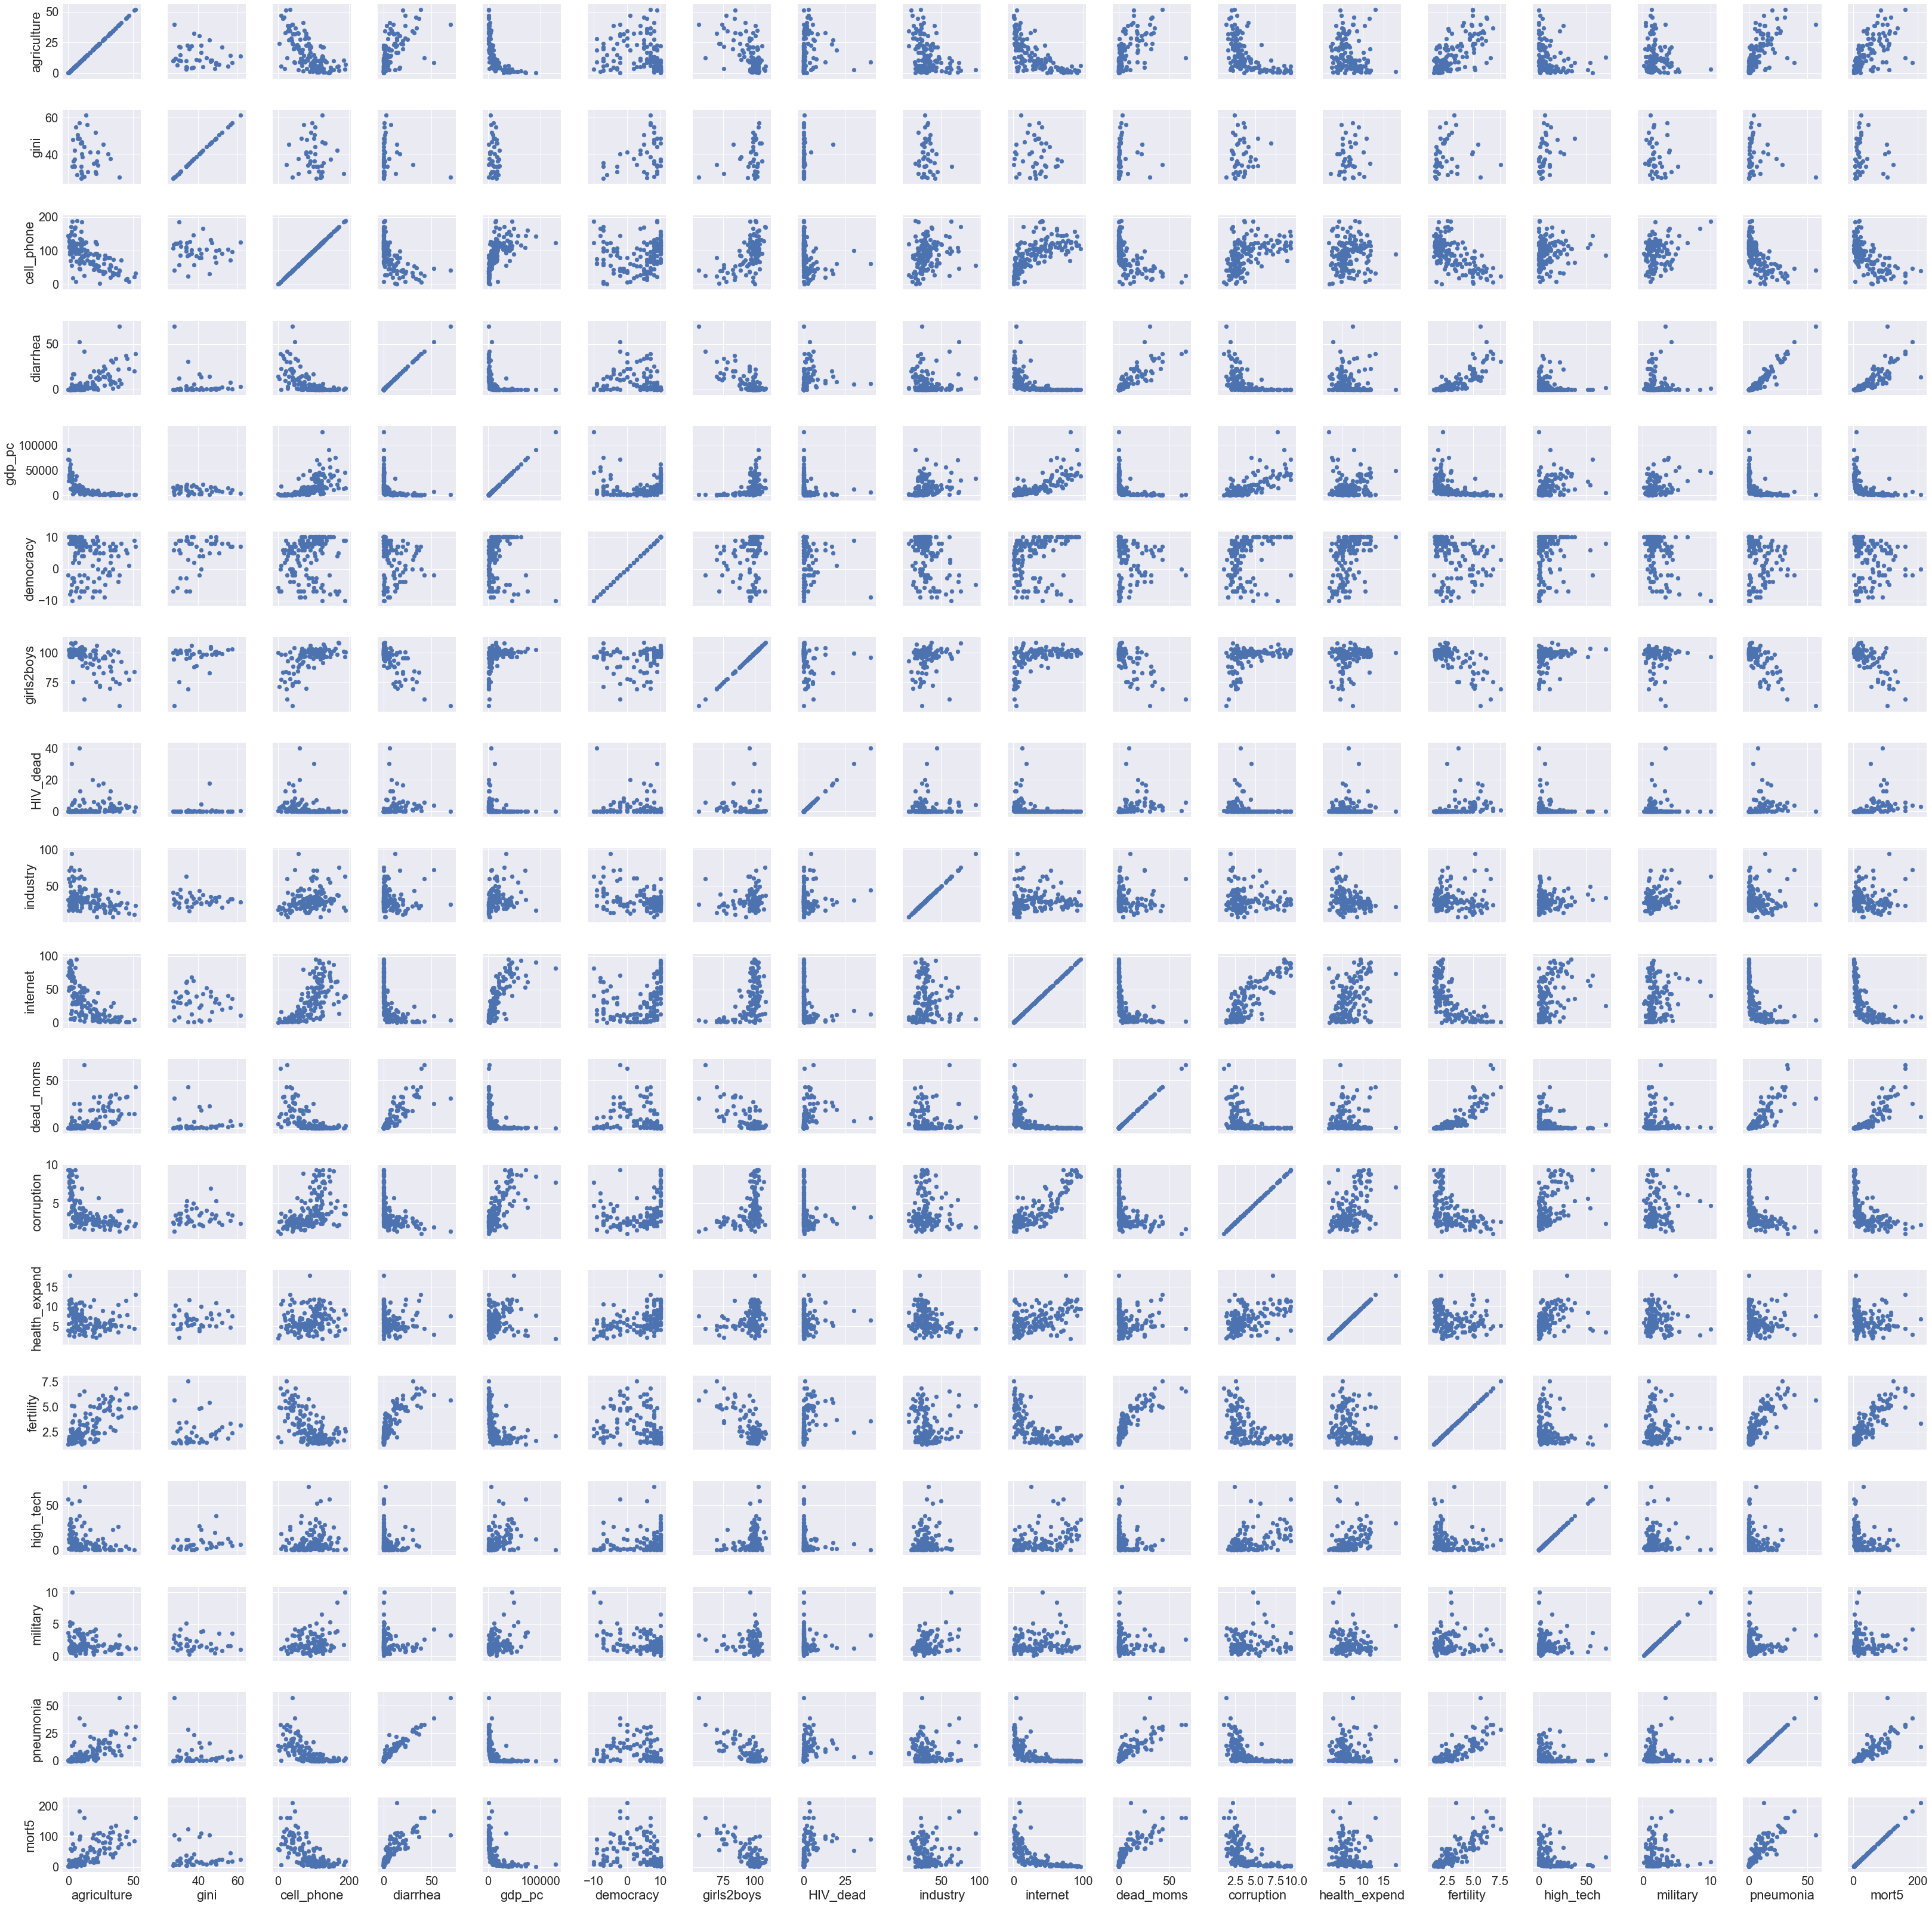

In [16]:
sns.set(font_scale=2.0)
g = sns.PairGrid(df_all)
g.map(plt.scatter);

This looks pretty good, but really it's all a matter of personal sense of aesthetics. Now let's just look at a subset of factors.  

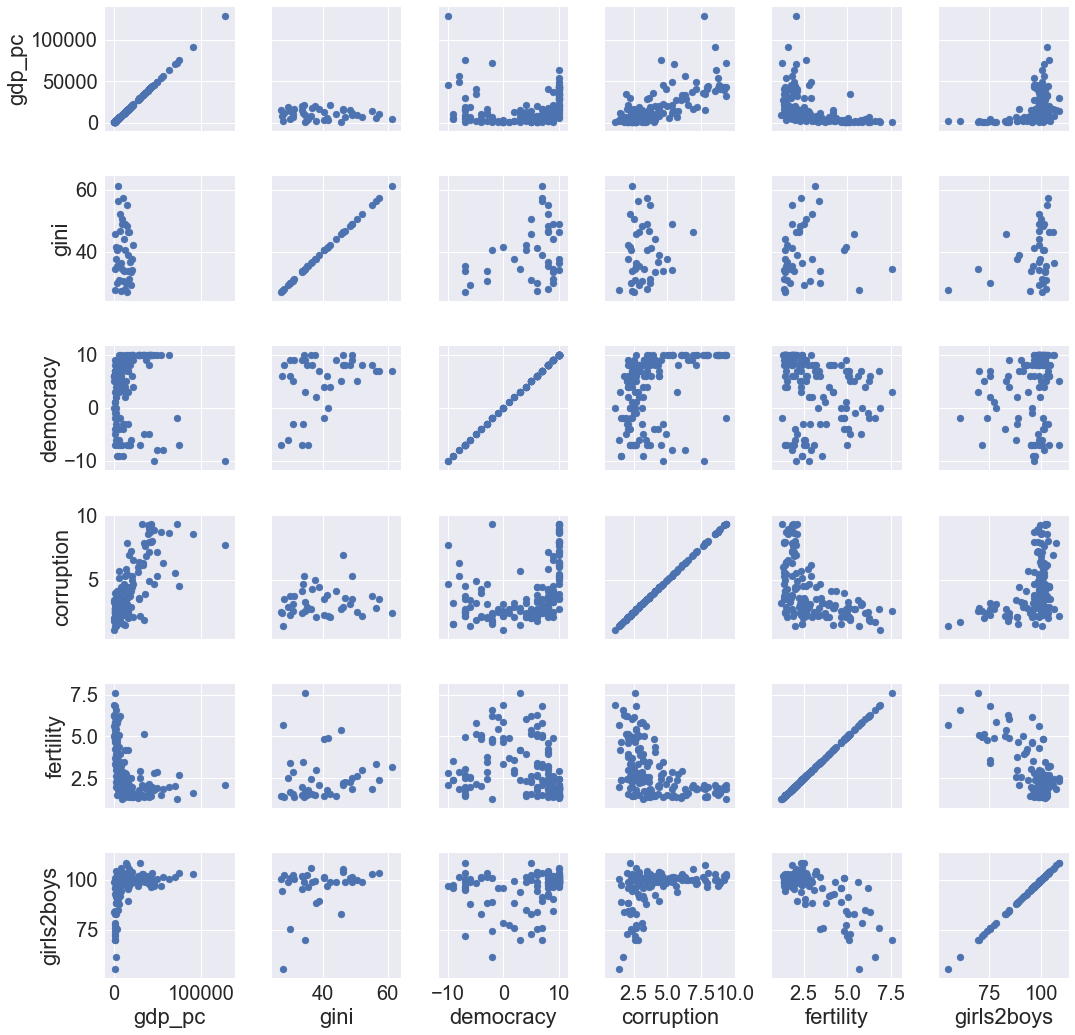

In [17]:
sns.set(font_scale=2.0)
g=sns.PairGrid(df_all, vars=
            ['gdp_pc', 'gini', 'democracy', 
             'corruption', 'fertility', 'girls2boys', ])
#g.map_upper(plt.scatter)
#g.map_lower(plt.scatter);
#g.map_diag(sns.kdeplot, legend=False);
g.map(plt.scatter);

This is interesting. My a priori assumption was that democracy and corruption would be negatively correlated, but there doesn't seem to be too much of a relationship just from a visual inspection. But rather than cherry-picking variables to explore and then eyeballing the scatterplots, let's just toss the whole dataframe into the pythonic meat grinder and have it spit out a nice tidy correlation matrix:

In [18]:
corr_matrix = df_all.corr()
corr_matrix

agriculture      gini  cell_phone  diarrhea    gdp_pc  \
agriculture       1.000000 -0.160650   -0.676799  0.615272 -0.658815   
gini             -0.160650  1.000000   -0.060445 -0.172878 -0.111326   
cell_phone       -0.676799 -0.060445    1.000000 -0.622328  0.559833   
diarrhea          0.615272 -0.172878   -0.622328  1.000000 -0.422113   
gdp_pc           -0.658815 -0.111326    0.559833 -0.422113  1.000000   
democracy        -0.182411  0.345661    0.175206 -0.185800  0.011708   
girls2boys       -0.573235  0.300239    0.586730 -0.777047  0.404403   
HIV_dead          0.117587  0.124831   -0.278915  0.212179 -0.220165   
industry         -0.361485 -0.133273    0.234257 -0.020534  0.210468   
internet         -0.673945 -0.086739    0.638438 -0.551066  0.778366   
dead_moms         0.609026 -0.059914   -0.616484  0.852927 -0.428627   
corruption       -0.575101  0.094533    0.483780 -0.457759  0.732248   
health_expend    -0.224126  0.114064    0.107452 -0.117990  0.147768   
fertility         0.689435  0.074658   -0.645481  0.820284 -0.486011   
high_tech        -0.314710  0.295401    0.124062 -0.186145  0.285564   
military         -0.165611 -0.149486    0.264386 -0.042488  0.270583   
pneumonia         0.661292 -0.163268   -0.653737  0.963513 -0.480701   
mort5             0.651311 -0.055926   -0.676690  0.835191 -0.515836   

               democracy  girls2boys  HIV_dead  industry  internet  dead_moms  \
agriculture    -0.182411   -0.573235  0.117587 -0.361485 -0.673945   0.609026   
gini            0.345661    0.300239  0.124831 -0.133273 -0.086739  -0.059914   
cell_phone      0.175206    0.586730 -0.278915  0.234257  0.638438  -0.616484   
diarrhea       -0.185800   -0.777047  0.212179 -0.020534 -0.551066   0.852927   
gdp_pc          0.011708    0.404403 -0.220165  0.210468  0.778366  -0.428627   
democracy       1.000000    0.215850 -0.122007 -0.356566  0.319332  -0.150097   
girls2boys      0.215850    1.000000 -0.133659  0.144127  0.486776  -0.721752   
HIV_dead       -0.122007   -0.133659  1.000000  0.058274 -0.301049   0.330539   
industry       -0.356566    0.144127  0.058274  1.000000 -0.017489  -0.007698   
internet        0.319332    0.486776 -0.301049 -0.017489  1.000000  -0.571236   
dead_moms      -0.150097   -0.721752  0.330539 -0.007698 -0.571236   1.000000   
corruption      0.381754    0.398775 -0.179007 -0.103801  0.851408  -0.442880   
health_expend   0.493514    0.255718 -0.016478 -0.354727  0.438507  -0.089168   
fertility      -0.257606   -0.713349  0.327835 -0.032912 -0.683476   0.858711   
high_tech       0.173357    0.257076 -0.154324  0.020235  0.381324  -0.211231   
military       -0.408648   -0.027899 -0.017962  0.326753  0.083488  -0.112698   
pneumonia      -0.201161   -0.760070  0.224242 -0.013765 -0.625770   0.837858   
mort5          -0.243807   -0.748663  0.401536  0.056116 -0.695300   0.851200   

               corruption  health_expend  fertility  high_tech  military  \
agriculture     -0.575101      -0.224126   0.689435  -0.314710 -0.165611   
gini             0.094533       0.114064   0.074658   0.295401 -0.149486   
cell_phone       0.483780       0.107452  -0.645481   0.124062  0.264386   
diarrhea        -0.457759      -0.117990   0.820284  -0.186145 -0.042488   
gdp_pc           0.732248       0.147768  -0.486011   0.285564  0.270583   
democracy        0.381754       0.493514  -0.257606   0.173357 -0.408648   
girls2boys       0.398775       0.255718  -0.713349   0.257076 -0.027899   
HIV_dead        -0.179007      -0.016478   0.327835  -0.154324 -0.017962   
industry        -0.103801      -0.354727  -0.032912   0.020235  0.326753   
internet         0.851408       0.438507  -0.683476   0.381324  0.083488   
dead_moms       -0.442880      -0.089168   0.858711  -0.211231 -0.112698   
corruption       1.000000       0.456776  -0.517169   0.417119  0.018424   
health_expend    0.456776       1.000000  -0.237652   0.278150 -0.134075   
fertility       -0.517169      -0.237652  

Okay, now we have some hard numbers to look at. Let's visualize these with a heatmap so that we can see at a glance what the hotspots are to select for further analysis. I'll use the _coolwarm_ color map to better distinguish those values that are furthest from zero correlation:

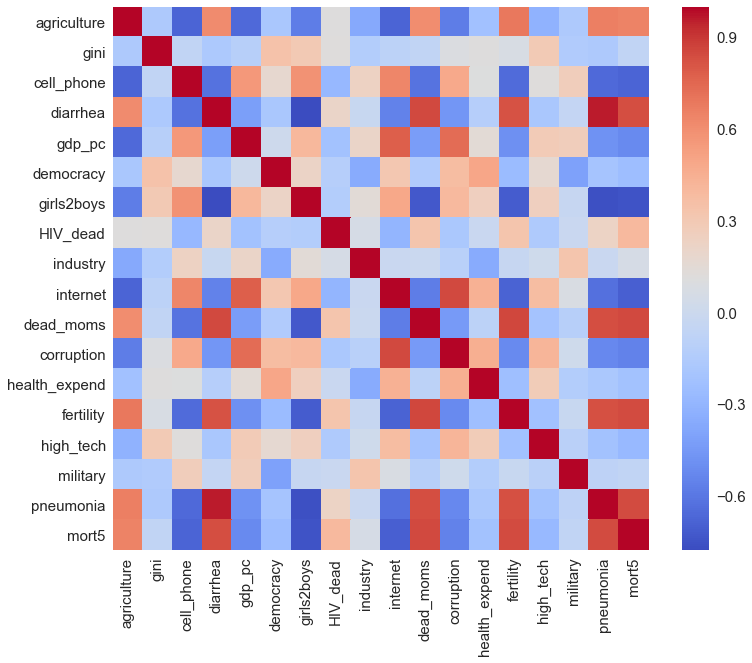

In [19]:
plt.figure(figsize = (12,10))
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix, cmap="coolwarm");

### Clustermap groups according to similarity
We can extend the results from above by using a seaborn clustermap to rearrange the heatmap using a dendrogram that shows relatedness between all the indicators. This helps to organize the output and show more clearly the relationships between indicators:

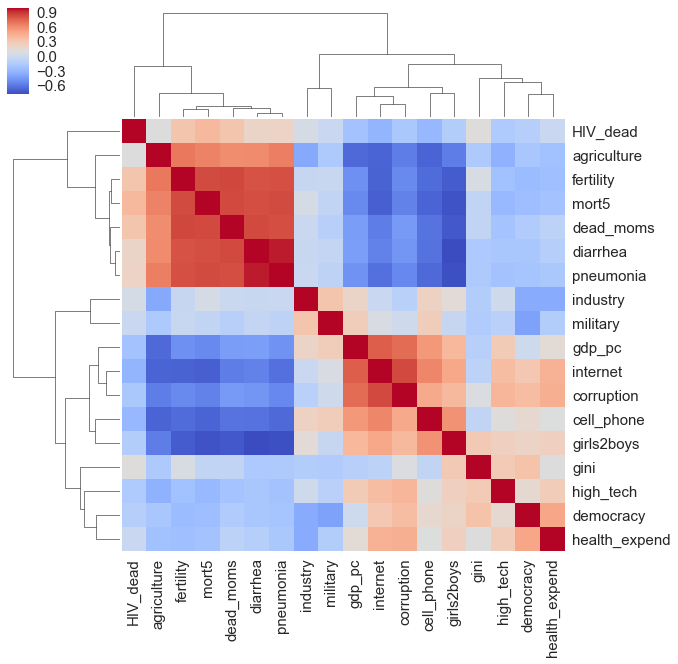

In [17]:
sns.clustermap(corr_matrix, cmap="coolwarm");

### Gapminder indicators segregate into two distinct sets: health/mortality and social/economic
With the exception of agriculture, all the indicators in the first cluster are health related. The second cluster does not include any health measures and is comprised of social, political, and economic indicators. The GINI index doesn't seem to show a strong correlation with any other indicator, suggesting that income inequality is not an important factor, at least in terms of health indices. So we can safely exclude this tiny dataset as we look at a smaller subset of indicators.


### The ratio of girls to boys in school shows a strong correlation with disease-related child mortality. 
This was unexpected, because reasons for reduced girls school attendance tend to be religious and cultural even if grounded in a lower GDP per capita. On the other hand, childhood diseases such as diarrhea and pneumonia are more closely related to hygiene issues such as a lack of potable water, refrigeration and access to medical care. 

We will take a look at a subset of our main dataframe to explore more closely the relationships between girls' school attendance and child mortality causes. Although preliminary plotting of scatterplots to get a quick scan is fine on less than clean data, to do statistics on this subset we need to do a little more cleanup. Since we're not limited by that tiny GINI set of 42, we can more safely eliminate rows with NaN. First, let's create a new dataframe that includes only the factors we're interested in:

In [20]:
df_girls_corr = df_all[['girls2boys','fertility', 'mort5', 'dead_moms', 'diarrhea', 'pneumonia', 'HIV_dead']]

In [21]:
df_girls_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
girls2boys    126 non-null float64
fertility     162 non-null float64
mort5         162 non-null float64
dead_moms     162 non-null float64
diarrhea      162 non-null float64
pneumonia     162 non-null float64
HIV_dead      162 non-null float64
dtypes: float64(7)
memory usage: 10.1+ KB


Remove NaN's from this dataframe to allow for statistical analysis:

In [22]:
df_girls = df_girls_corr.dropna()
df_girls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, Afghanistan to Vietnam
Data columns (total 7 columns):
girls2boys    126 non-null float64
fertility     126 non-null float64
mort5         126 non-null float64
dead_moms     126 non-null float64
diarrhea      126 non-null float64
pneumonia     126 non-null float64
HIV_dead      126 non-null float64
dtypes: float64(7)
memory usage: 7.9+ KB


Let's re-do the correlation matrix with the smaller, cleaner dataframe:

In [23]:
girls_corr = df_girls.corr()
girls_corr

girls2boys  fertility     mort5  dead_moms  diarrhea  pneumonia  \
girls2boys    1.000000  -0.713349 -0.748663  -0.721752 -0.777047  -0.760070   
fertility    -0.713349   1.000000  0.903948   0.877837  0.833413   0.825654   
mort5        -0.748663   0.903948  1.000000   0.902053  0.833545   0.841515   
dead_moms    -0.721752   0.877837  0.902053   1.000000  0.838838   0.806947   
diarrhea     -0.777047   0.833413  0.833545   0.838838  1.000000   0.956678   
pneumonia    -0.760070   0.825654  0.841515   0.806947  0.956678   1.000000   
HIV_dead     -0.133659   0.295897  0.423287   0.315148  0.189901   0.186924   

            HIV_dead  
girls2boys -0.133659  
fertility   0.295897  
mort5       0.423287  
dead_moms   0.315148  
diarrhea    0.189901  
pneumonia   0.186924  
HIV_dead    1.000000

And now plot another clustermap with our smaller dataset:

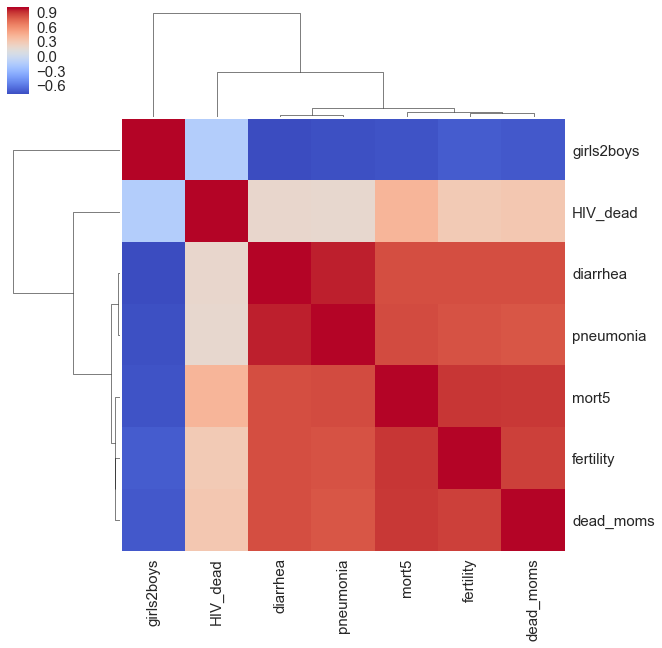

In [24]:
sns.clustermap(girls_corr, cmap="coolwarm");

#### HIV deaths under 5 seem to have the lowest correlation with any of the other indicators. <br>
One interesting result here is that HIV deaths per 1000 for children under 5 has the weakest correlation to all the other health indicators. Why might this be? My guess is that although diarrhea and pneumonia are fairly ubiquitous, HIV is geographically constrained, with sub-Saharan Africa being most severly affected, whereas other regions sometimes show minimal rates of infection and subsequent mortality. Thus the rest of the world dilutes the impact of HIV mortality resulting in a lower correlation with the other health indices. <br><br>
Let's do another scatter matrix using seaborn PairGrid. With fewer plots we won't have to squint to see the results:

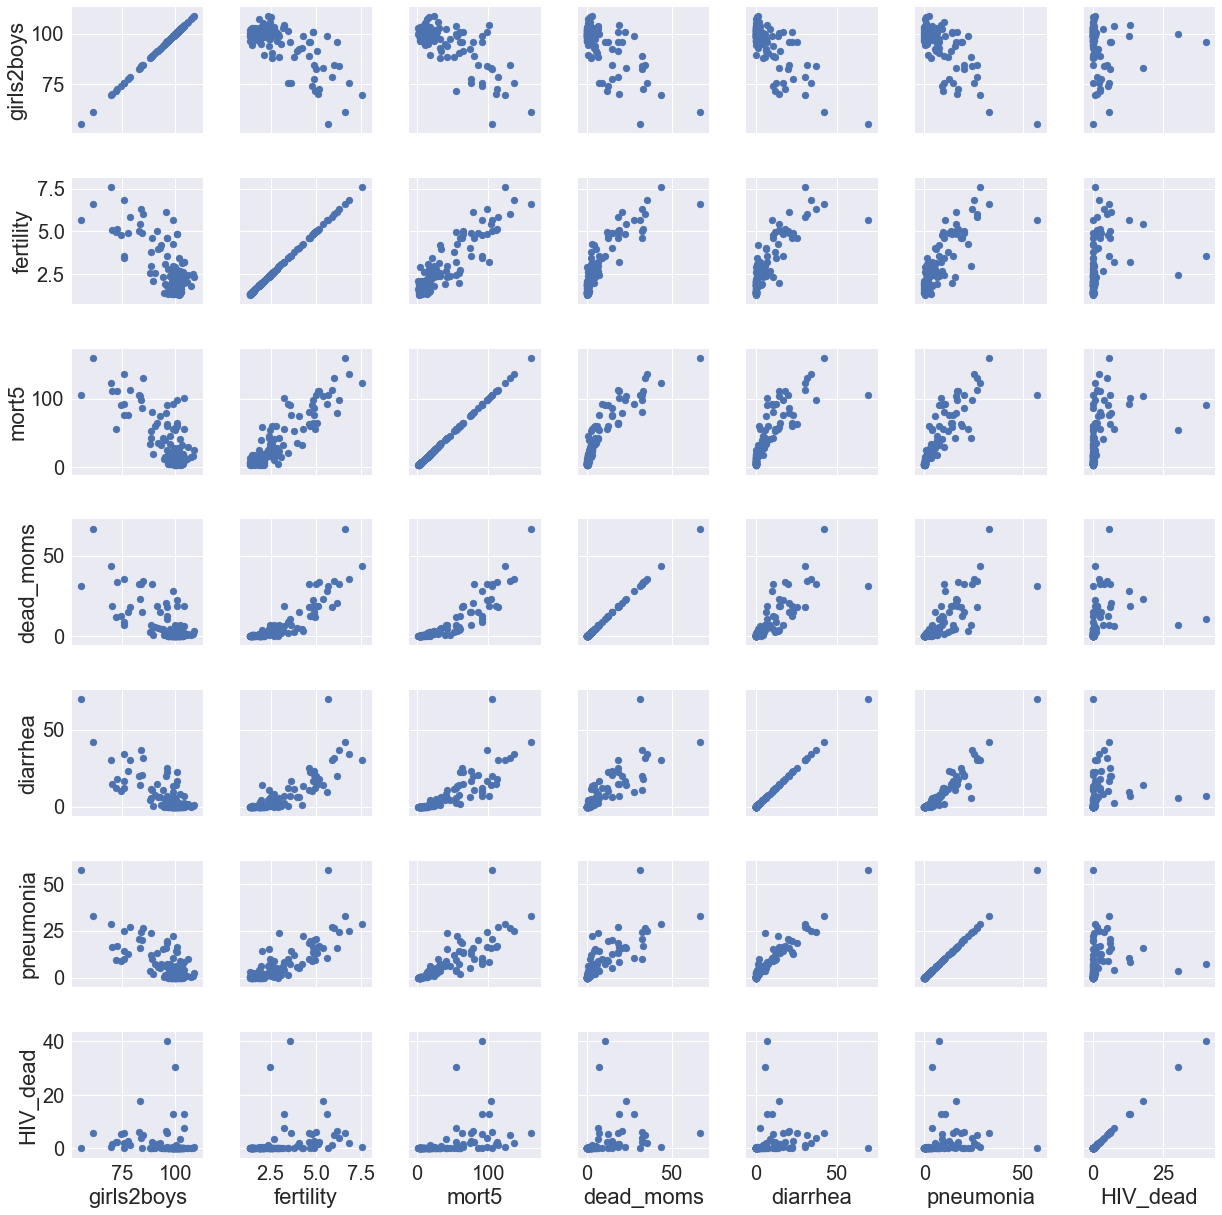

In [25]:
sns.set(font_scale=2.0)
g=sns.PairGrid(df_girls)
g.map(plt.scatter);

Scatter plots visually confirm what the clustermap tell us: HIV mortality does not seem to correlate well with the other indicators. We will test this more formally in a bit, but lets look at another plot first. 

#### Use plotly to look at sorted girl:boy ratios around the world
Plotly is a useful and powerful tool due to its interactive features such as hover annotation, zoom in/out, pan and others. So for example, I'm interested in knowing which countries have low - and high - ratios of girls to boys in schools. I've created a new sub-frame with the girls:boys ratios sorted from low to high, then plotted them using plotly. Mouse over the graph below and you can see instantly what the country is at that data point. This is a lot cleaner and more compact than trying to print out all 126 country names on a single graph or chart. 

In [26]:
df_girl_sort = df_girls.girls2boys.sort_values()
df_girl_sort.iplot()

Next, we'll use plotly to look at a bubble plot of girls-to-boys in school vs all causes of mortality in children under 5. We will set the bubble size to fertility, which is also a strong correlate of child mortality, and is highly correlated inversely with GDP per capita. In preliminary testing, plotly didn't want to use the country index for hover-over annotation, which is somewhat counterintuitive, since in the previous plot the country index was chosen by plotly as the default index for mouse-over labeling. However, I found that if I copy the country index to a new data column, plotly will gladly accept that as the text label. 

In [27]:
df_girls2 = df_girls
df_girls2['Country']=df_girls.index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
df_girls2.iplot(kind='bubble',x='girls2boys',y='mort5',text='Country', mode='markers',size='fertility')

Plotly is really a great interactive visualization tool here. In addition to being able to identify each data point by country, it is interesting to see - especially after zooming in - how fertility rates (bubble size) drop dramatically at the lower right side of the chart. Basically, wealthy industrialized countries send all their girls to schools, children don't die of preventable and treatable diseases, and women have fewer children - so few, in fact, that countries such as Japan and many in Western Europe are at risk of losing population unless balanced by immigration. 

### One more comparison: GDP per capita vs child mortality measures
The relative wealth or poverty of a nation is best expressed in terms of GDP per capita, and this is known to be a strong driving force in terms of child mortality. And yet, from the heat maps and correlation matrices generated above, GDP per capita seems a weak predictor of child mortality compared to other factors such as the girls to boys in-school ratio. This flies in the face of what we all know - or assume to know - and thus it's worth a closer look. Let's start by adding back the gdp_pc column to our dataframe containing measures of child mortality and girls to boys in school. Let's drop the missing values and do a scatter matrix, calculate correlation coefficients, and then do a clustermap.

In [29]:
df_gdp_corr = df_all[['gdp_pc','girls2boys','fertility', 'mort5', 'dead_moms', 'diarrhea', 'pneumonia']]

In [30]:
df_gdp_corr= df_gdp_corr.dropna()

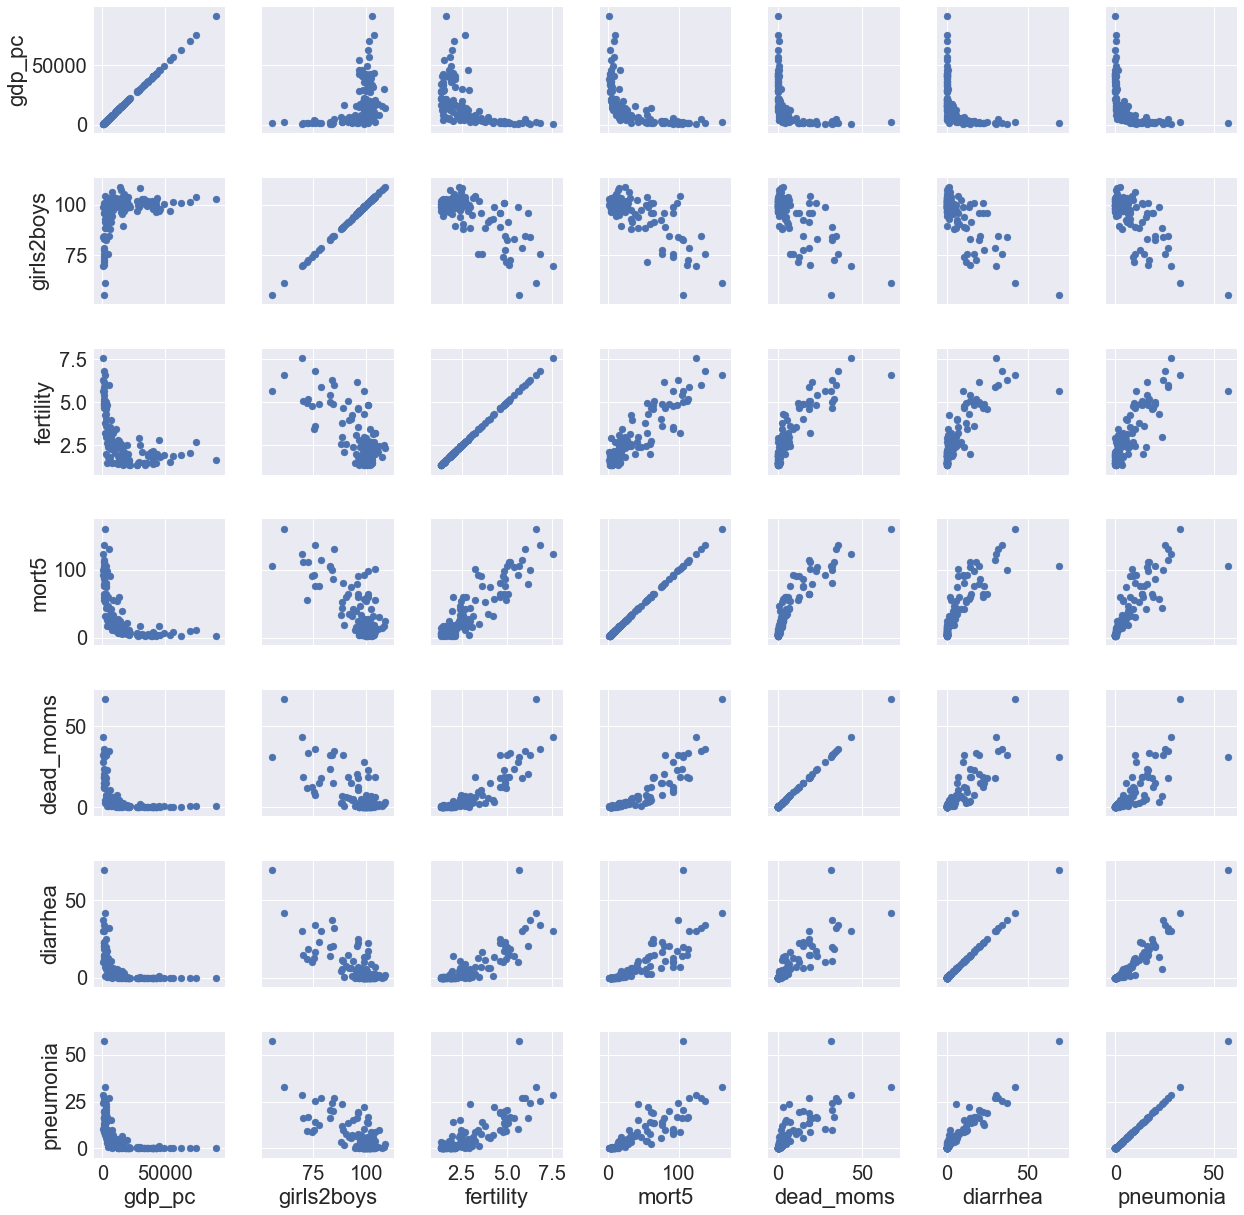

In [31]:
sns.set(font_scale=2.0)
g=sns.PairGrid(df_gdp_corr)
g.map(plt.scatter);

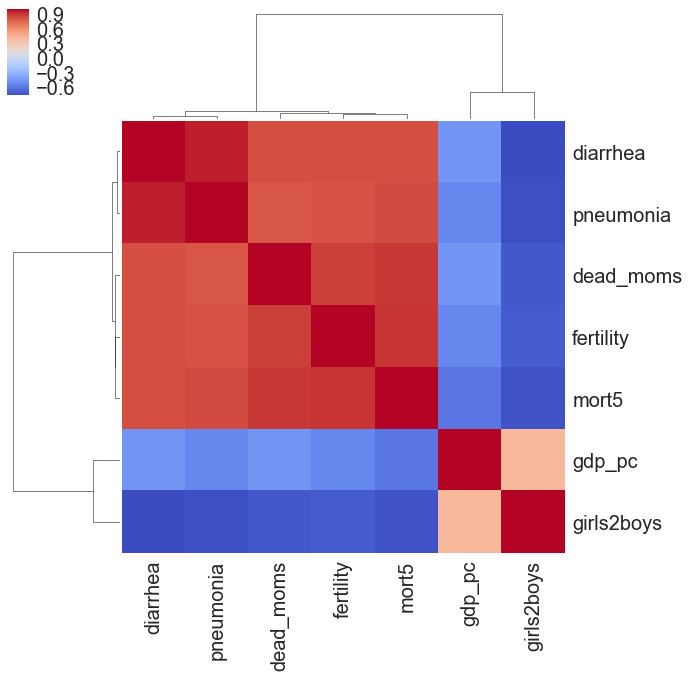

In [32]:
gdp_corr = df_gdp_corr.corr()
sns.clustermap(gdp_corr, cmap="coolwarm");

#### What's going on here? 
There seems to be a strong non-linear relationship between GDP per capita and these other measures. Let's just look at two - under 5 mortality and girls in school.

We can get a different perspective on this if we use a logarithmic scale for GDP per capita on the x-axis:

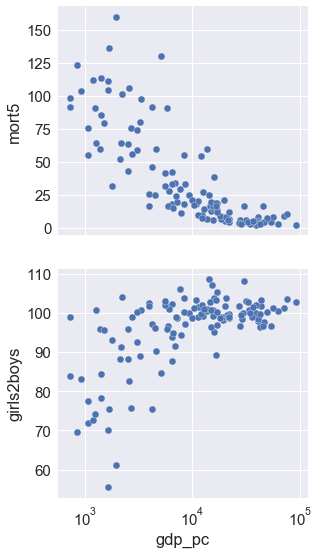

In [33]:
sns.set(font_scale=1.5)
sns.pairplot(df_gdp_corr, x_vars=['gdp_pc'], y_vars=['mort5', 'girls2boys'], size=4, aspect=1.2)
plt.xscale('log');

These data suggest that there is a threshold effect of GDP per capita on both child mortality and girls in school. Below about 10,000 USD, both of these measures are scattered all over the place, but once this threshold is crossed, child mortality plummets, and girls school attendance skyrockets to a level of parity with boys. This has implications for public policy decisions that I will discuss in the conclusion.

### Some basic statistics
This is a bit ahead of schedule, but let's do a simple regression analysis between GDP per capita and child mortality under 5. This will wrap up our analysis of the Gapminder dataset. 

In [34]:
import statsmodels.api as sm

x = df_gdp_corr.gdp_pc
y = df_gdp_corr.mort5
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mort5   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.966
Date:                Tue, 24 Jul 2018   Prob (F-statistic):             0.0486
Time:                        11:16:22   Log-Likelihood:                -670.58
No. Observations:                 126   AIC:                             1343.
Df Residuals:                     125   BIC:                             1346.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp_pc         0.0004      0.000      1.991      0.049    2.18e-06       0.001
==============================================================================
Omnibus:                       20.152   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.948
Skew:                           1.082   Prob(JB):                     3.83e-06
Kurtosis:                       3.270   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The correlation of GDP per capita and child mortality barely passes the p<.05 threshold
This is not surprising since the relationship between the two variables is highly non-linear. Just for fun, let's do a log10 transformation of the gdp_pc and repeat the regression analysis:

In [35]:
df_gdp_log = df_gdp_corr
df_gdp_log.gdp_pc = df_gdp_log.gdp_pc.apply(lambda x: np.log10(x))

In [36]:
x = df_gdp_log.gdp_pc
y = df_gdp_log.mort5
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mort5   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     71.21
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           6.74e-14
Time:                        11:16:27   Log-Likelihood:                -644.14
No. Observations:                 126   AIC:                             1290.
Df Residuals:                     125   BIC:                             1293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp_pc         7.5310      0.892      8.438      0.000       5.765       9.297
==============================================================================
Omnibus:                       24.187   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.577
Skew:                           1.207   Prob(JB):                     1.39e-07
Kurtosis:                       3.433   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now there is a highly significant correlation between child mortality and log(GDP per capita)

<a id='conclusions'></a>
## Conclusions
### Gapminder indicators show unexpected relationships
In selecting the different Gapminder data sets, my primary interest was in child mortality. What I wanted to explore however was whether there were indicators beyond the usual suspects - GDP per capita - that might be related. By comparing all the indicators together there were some surprises and interesting results unrelated to child mortality. I was interested in how the GINI index of income inequality would relate to child mortality and other indicators, but in fact it doesn't correlate very well with any. Income inequality can occur in the most advanced and prosperous countries such as the US, but also in poor countries. Likewise with the democracy index - there are countries both rich and poor, corrupt and not so corrupt - that have high - and low - measures of democracy. It's just not a good predictor of any of the other indicators. 

### The ratio of girls to boys in school is the indicator most highly correlated with measures of child mortality
I had predicted that GDP per capita would be the single factor most highly correlated with childhood mortality, but in fact the initial analysis showed that the ratio of girls to boys was the best predictor. Clearly this is worth investigating further to determine the factors that lead a society to keep girls out of school also predispose their children of both sexes to die at young age. 

### There may be a threshold for GDP per capita above which a number of indicators improve dramatically
There is a highly non-linear relationship between GDP per capita and child mortality, as well as girls to boys in school, and when we compare the log of GDP per capita with these indicators, we linearize this and get a highly statistically significant correlation. More importantly, there appears to be a threshold effect where things get drastically better after about 10,000 USD. Below this there is quite a spread in terms of child mortality and girls to boys in school, but above this, both measures dramatically improve to their best levels. This is in a way quite gratifying, because it says that by providing sufficient levels of foreign aid to the very poorest countries, we could potentially raise their quality of life nearly to the level of the most developed wealthy countries. Poor people may still be poor but their daughters will be getting an education and their children will not be dying of preventable and treatable childhood diseases. This was the best thing I learned after investigating the Gapminder dataset: there is hope after all. 